In [1]:
%matplotlib inline
import os
import re

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

/lfs1/home/jackyu/anaconda3/envs/work/lib/python3.4/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


<module 'climatools.scripts.g1_threshold' from '/lfs1/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
# for printing some input parameters

def innames():
    return ['vstar', 'nband', 'nv', 'dv',
            'tsfc', 
            'pressure_reference_1',
            'temperature_reference_1', 
            'pressure_reference_2', 
            'temperature_reference_2',
            'ighigh', 
            'ng', 
            'absth',
            'wgt',
            'planck_wgt_flux']


def pattern_assign(name):
    return ''' 
    parameter .* :: \s* ({} \s* = .* \n)
    '''.format(name)

def pattern_data(name):
    return '''
    (data [^/{name}]+ {name}[^,] [^/{name}]+ / [^/]+ /)
    '''.format(name=name)

def pattern_atmpro():
    return '''
    (include \s+ '.*\.pro')
    '''


def get_input_params(code, names):
    results = []
    for name in names:
        regex = re.compile(pattern_assign(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
        regex = re.compile(pattern_data(name), re.VERBOSE)
        results.extend(regex.findall(code))
        
    regex = re.compile(pattern_atmpro(), re.VERBOSE)
    results.extend(regex.findall(code))
        
    results = [result.replace('_r8', '') for result in results]
    return results


In [3]:
analysis = scripts.Analysis()

In [4]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_7',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_4',
                          'getabsth_user__user',
                          'absth_4.2e-16_1.84e-17_8.0e-19_3.5e-20__3.0e-19_1.34e-20_5.9e-22',
                          'wgt_1._.9_.8_.7__all.6',
                          'bigsum',
                          'atmpro_mls')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [5]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/lfs1/home/jackyu/radiation/crd/LW',
                          'examples/separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'h2o',
                          'band01_wn_10_340',
                          'ng_7',
                          'g_descending',
                          'refPTs_P_1_T_250__P_200_T_250',
                          'ighigh_4',
                          'getabsth_user__user',
                          'absth_4.2e-16_1.84e-17_8.0e-19_3.5e-20__3.0e-19_1.34e-20_5.9e-22',
                          'wgt_1._.9_.8_.7__all.6',
                          'bigsum',
                          'atmpro_mls')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [6]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = list(range(1, 7 + 1))
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [7]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [8]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [9]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [10]:
# print some input parameters

with open(os.path.join(crd.rundir, 'lblnew.f'), 
          mode='r', encoding='utf-8') as f:
    c = f.read()

print('\n\n'.join(get_input_params(c, innames())))

vstar = 10

nband = 330

nv = 200

dv = 0.005

tsfc = 294.0

pressure_reference_1 = 1.

temperature_reference_1 = 250.

pressure_reference_2 = 200.

temperature_reference_2 = 250.

ighigh = 4

ng = 7

data absth(:, 1)
     &    /1, 1, 1,
     &     3.5351e-20, 8.0651E-19,   1.8400E-17,
     &     4.1979E-16/

data absth(:, 2)
     &    /5.9187e-22,  1.3434e-20,  3.0491e-19,
     &     1,   1,   1,
     &     1/

data wgt
     &     /.6, .6, .6, .7, .8, .9, 1./

planck_wgt_flux = 2

include 'mls75.pro'


In [11]:
fig.display_hrefanchor()

In [12]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [13]:
table_dgdgs.display_hrefanchor()

In [14]:
s_abscom = 'Overall absth'
display.HTML(climahtml.getHTML_hrefanchor(s_abscom))

In [15]:
s_ggroup_summary = 'g-group summary'
display.HTML(climahtml.getHTML_hrefanchor(s_ggroup_summary))

In [16]:
#for g in range(1, 20 + 1):
#    s = 'Table: cooling rate. g-group {}'.format(g)
#    html = climahtml.getHTML_hrefanchor(s)
#    display.display(display.HTML(html))

# Figure: flux, cooling rate g-group 1

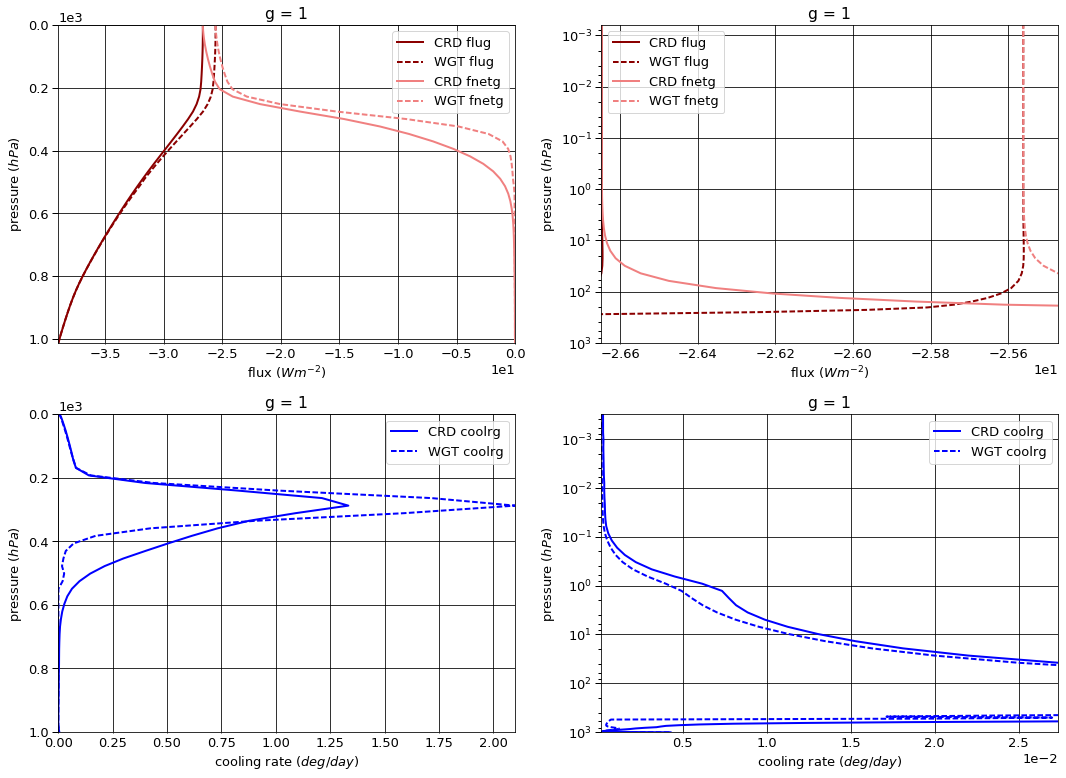

# Figure: flux, cooling rate g-group 2

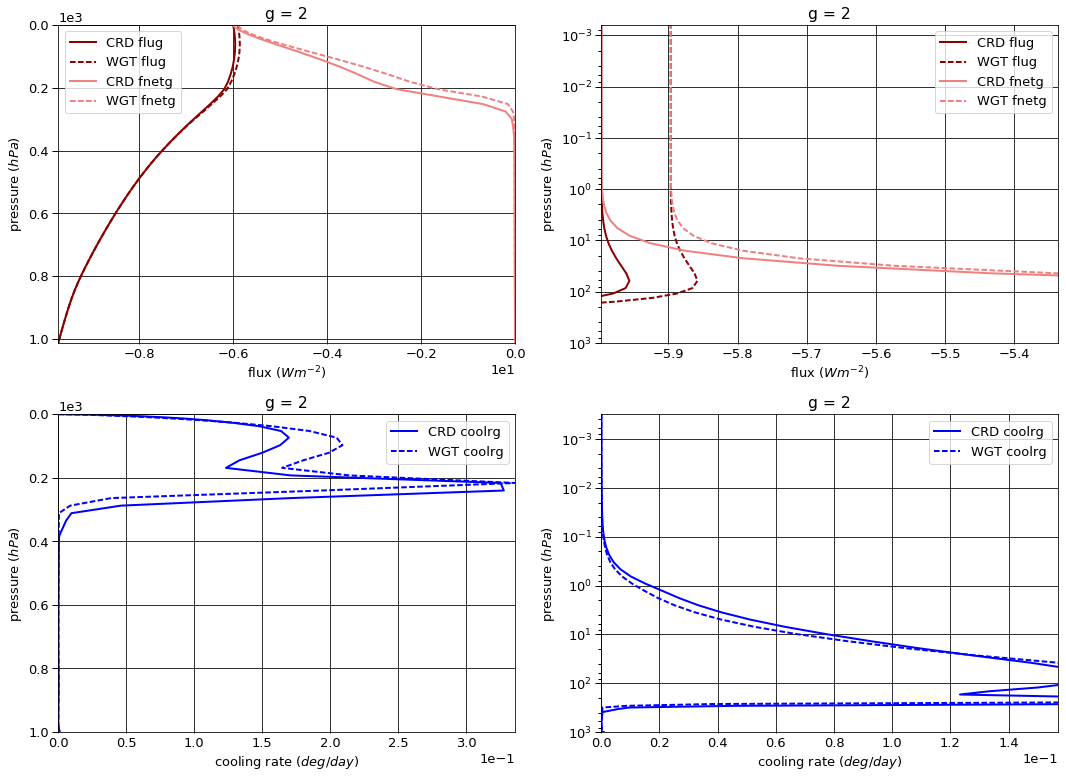

# Figure: flux, cooling rate g-group 3

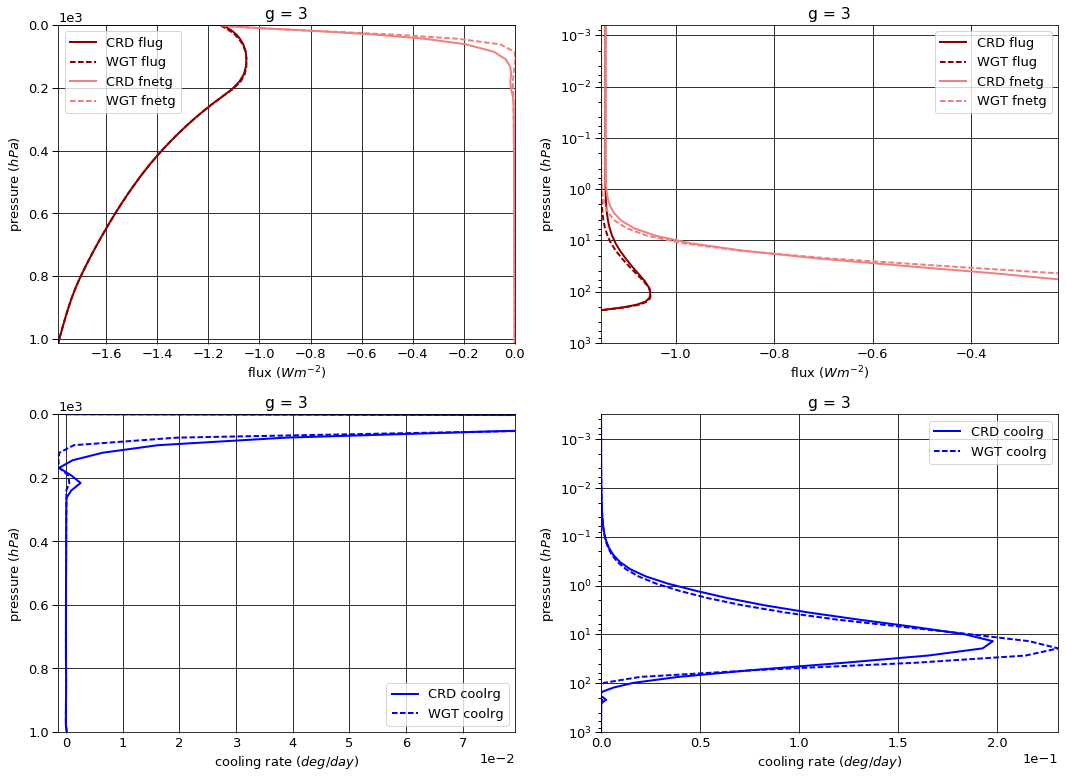

# Figure: flux, cooling rate g-group 4

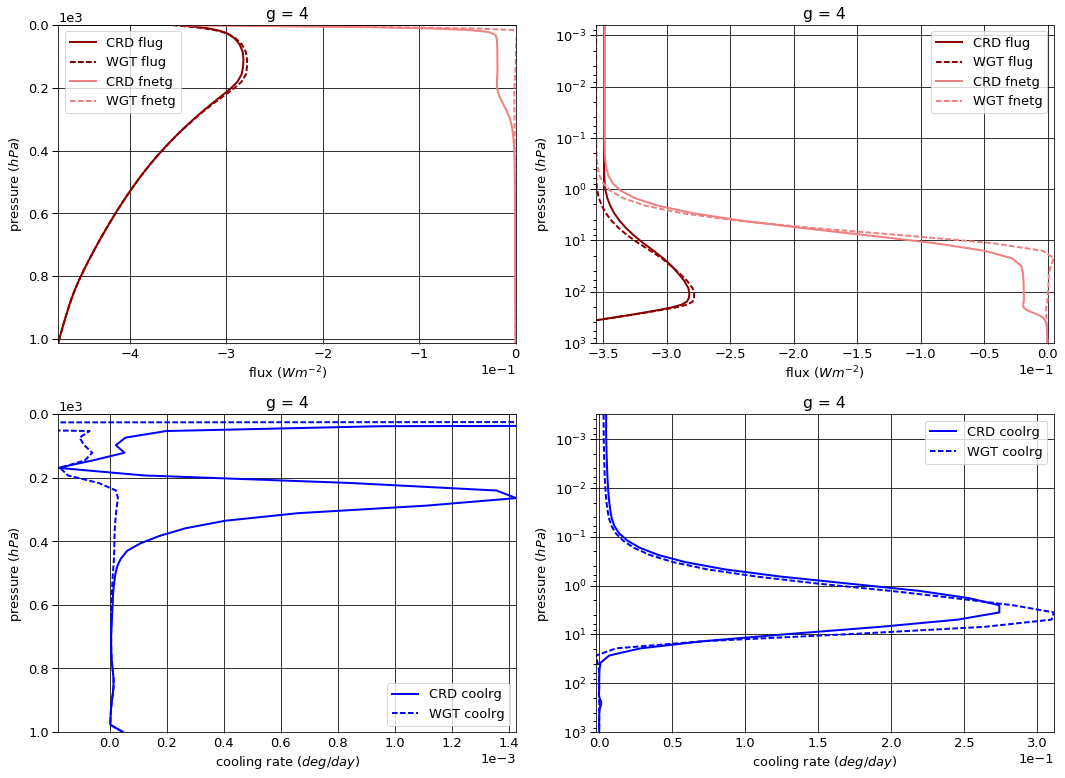

# Figure: flux, cooling rate g-group 5

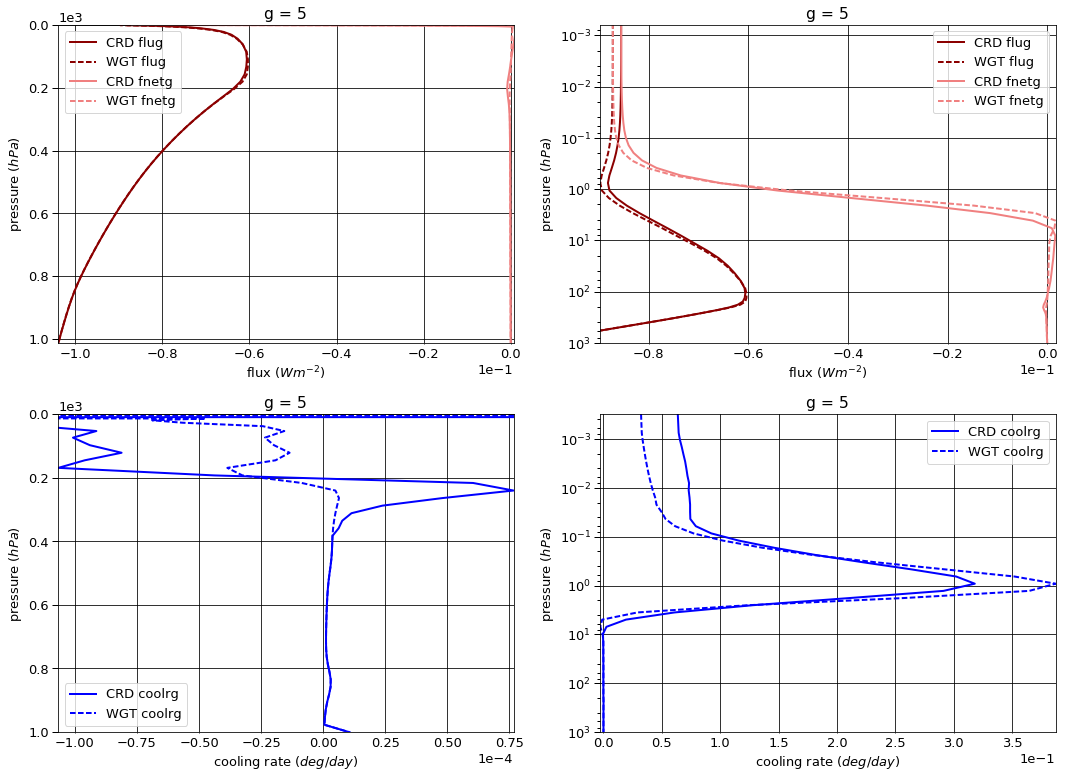

# Figure: flux, cooling rate g-group 6

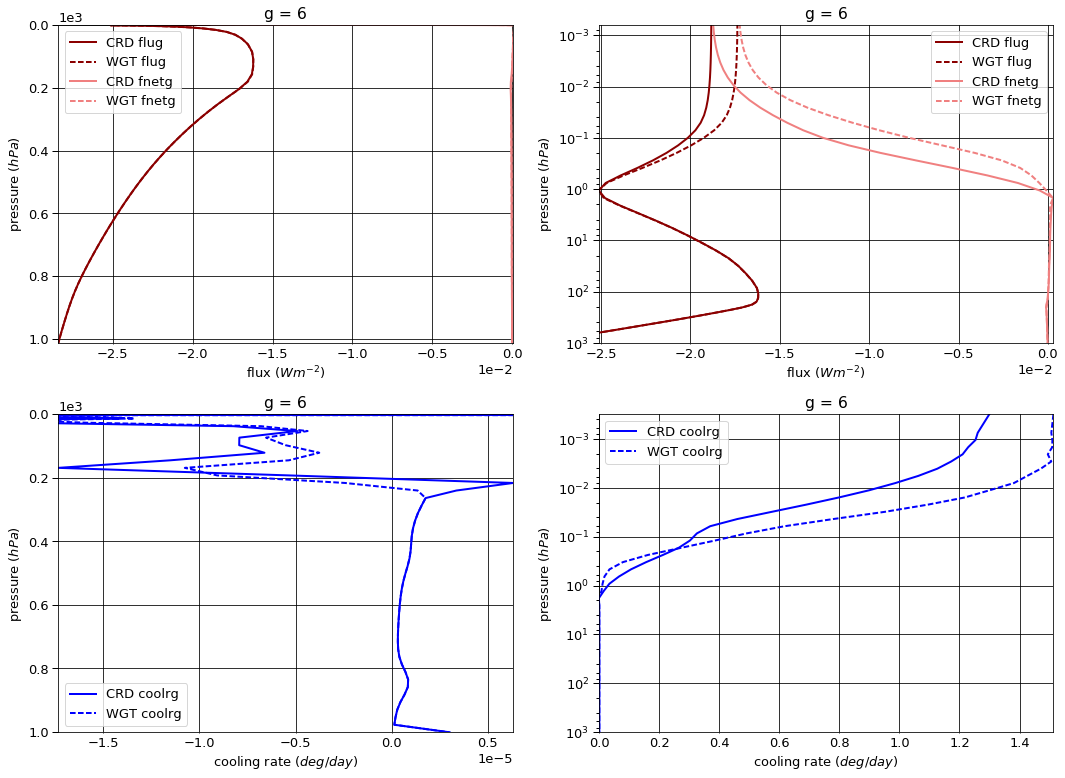

# Figure: flux, cooling rate g-group 7

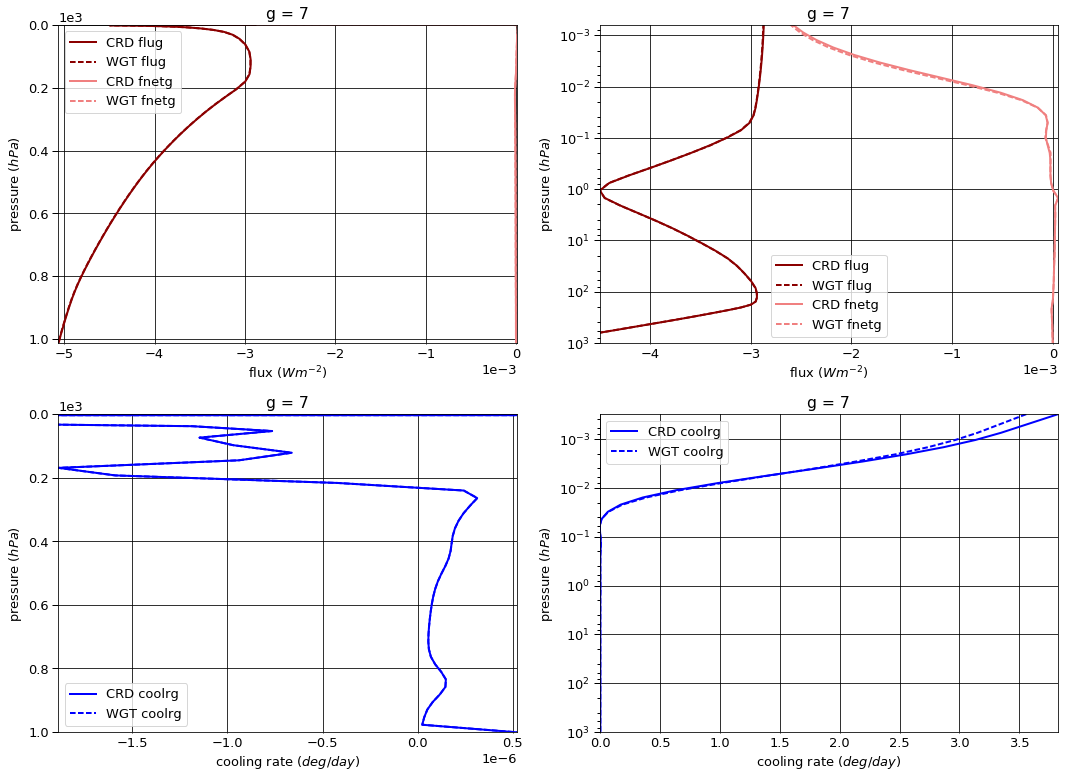

# Figure: flux, cooling rate g-group total

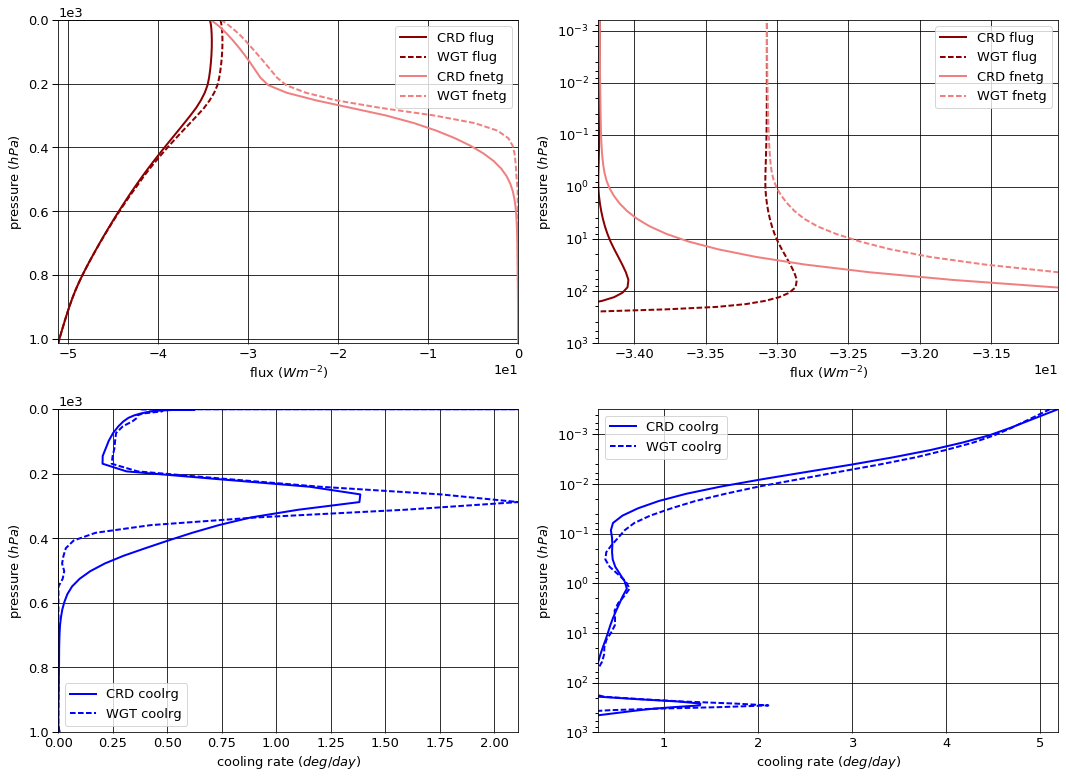

In [17]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [18]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -26.648167   0.000000 -26.648167
  1013.0   76    -38.972782  38.960918  -0.011864
2 0.0      1      -5.996829   0.000000  -5.996829
  1013.0   76     -9.718601   9.715873  -0.002728
3 0.0      1      -1.142725   0.000000  -1.142725
  1013.0   76     -1.787706   1.787206  -0.000500
4 0.0      1      -0.349135   0.000000  -0.349135
  1013.0   76     -0.474143   0.474010  -0.000133
5 0.0      1      -0.085506   0.000000  -0.085506
  1013.0   76     -0.103840   0.103811  -0.000030
6 0.0      1      -0.018827   0.000000  -0.018827
  1013.0   76     -0.028405   0.028396  -0.000008
7 0.0      1      -0.002863   0.000000  -0.002863
  1013.0   76     -0.005062   0.005060  -0.000001


WGT


flug       fldg      fnetg
g pressure level                                 
1 0.0      1     -25.560713   0.000000 -25.560713
  1013.0   76    -38.973221  38.961382  -0.011839
2 0.0      1      -5.896660   0.000000  -5.896660
  1013.0   76     -9.718163   9.715435  -0.002727
3 0.0      1      -1.151504   0.000000  -1.151504
  1013.0   76     -1.787684   1.787184  -0.000500
4 0.0      1      -0.355648   0.000000  -0.355648
  1013.0   76     -0.474166   0.474033  -0.000133
5 0.0      1      -0.087172   0.000000  -0.087172
  1013.0   76     -0.103871   0.103842  -0.000030
6 0.0      1      -0.017361   0.000000  -0.017361
  1013.0   76     -0.028403   0.028395  -0.000008
7 0.0      1      -0.002868   0.000000  -0.002868
  1013.0   76     -0.005065   0.005064  -0.000001


WGT - CRD


flug      fldg         fnetg
g pressure level                                  
1 0.0      1      1.087454  0.000000  1.087454e+00
  1013.0   76    -0.000439  0.000464  2.537000e-05
2 0.0      1      0.100169  0.000000  1.001690e-01
  1013.0   76     0.000438 -0.000438  1.761000e-07
3 0.0      1     -0.008779  0.000000 -8.779000e-03
  1013.0   76     0.000022 -0.000022  8.300000e-09
4 0.0      1     -0.006513  0.000000 -6.513230e-03
  1013.0   76    -0.000023  0.000023 -1.993000e-08
5 0.0      1     -0.001667  0.000000 -1.666622e-03
  1013.0   76    -0.000031  0.000031 -1.398700e-08
6 0.0      1      0.001466  0.000000  1.465966e-03
  1013.0   76     0.000002 -0.000002  5.827000e-10
7 0.0      1     -0.000005  0.000000 -4.595100e-06
  1013.0   76    -0.000003  0.000003 -1.041200e-09

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer              
1 0.000312    1      2.694541e-04
  1001.112500 75     4.289302e-03
2 0.000312    1      1.047917e-04
  1001.112500 75     9.863854e-04
3 0.000312    1      2.838105e-05
  1001.112500 75     1.808396e-04
4 0.000312    1      4.824205e-03
  1001.112500 75     4.801560e-05
5 0.000312    1      6.366046e-02
  1001.112500 75     1.069829e-05
6 0.000312    1      1.299554e+00
  1001.112500 75     3.015114e-06
7 0.000312    1      3.824800e+00
  1001.112500 75     5.215011e-07


WGT


coolrg
g pressure    layer              
1 0.000312    1      1.690166e-04
  1001.112500 75     4.280532e-03
2 0.000312    1      6.290510e-05
  1001.112500 75     9.863218e-04
3 0.000312    1      1.220351e-05
  1001.112500 75     1.808366e-04
4 0.000312    1      3.037550e-03
  1001.112500 75     4.802280e-05
5 0.000312    1      3.219141e-02
  1001.112500 75     1.070335e-05
6 0.000312    1      1.513025e+00
  1001.112500 75     3.014903e-06
7 0.000312    1      3.558795e+00
  1001.112500 75     5.218776e-07


WGT - CRD


coolrg
g pressure    layer              
1 0.000312    1     -1.004376e-04
  1001.112500 75    -8.770100e-06
2 0.000312    1     -4.188655e-05
  1001.112500 75    -6.365000e-08
3 0.000312    1     -1.617754e-05
  1001.112500 75    -2.990000e-09
4 0.000312    1     -1.786656e-03
  1001.112500 75     7.196000e-09
5 0.000312    1     -3.146906e-02
  1001.112500 75     5.054000e-09
6 0.000312    1      2.134716e-01
  1001.112500 75    -2.102000e-10
7 0.000312    1     -2.660052e-01
  1001.112500 75     3.764700e-10

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-34.244051,0.000000,-34.244051
1013.0,76,-51.090539,51.075275,-0.015264



WGT


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,-33.071926,0.000000,-33.071926
1013.0,76,-51.090573,51.075335,-0.015238



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0.0,1,1.172126,0.000000,1.172126
1013.0,76,-0.000034,0.000059,0.000026


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,5.193241
1001.112500,75,0.005519



WGT


,,coolrg
pressure,layer,
0.000312,1,5.107293
1001.112500,75,0.005510



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,-0.085948
1001.112500,75,-0.000009


In [19]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.720848,0.758444
2,0.224303,0.193713
3,0.041061,0.035667
4,0.010879,0.009457
5,0.002242,0.002061
6,0.000576,0.000559
7,0.000091,0.000100


In [20]:
# read and display overall absth
display.display(
    display.HTML(climahtml.getHTML_idanchor(s_abscom)))
display.display(
    display.Markdown(climahtml.getMarkdown_sectitle(s_abscom)))

display.display(pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'),
                sep=r'\s+',
                index_col=[0]))

# Overall absth

,abscom
g,
1,0.000000e+00
2,1.343400e-20
3,3.049100e-19
4,3.535100e-20
5,8.065100e-19
6,1.840000e-17
7,4.197900e-16


In [21]:
def spreadsheet():
    ng = 7
    ighigh = 4
    pref_1, pref_2 = 1, 200
    
    df_abscom = pd.read_csv(os.path.join(crd.rundir, 'abscom.dat'), 
                            sep=r'\s+', index_col=[0])
    
    # absth(g + 1) / absth(g)
    df_abscom_copy = df_abscom.copy()
    df_abscom_copy.index = df_abscom.index + 1
    df_absratio = df_abscom.loc[3:ng] / df_abscom_copy.loc[3:ng]
    df_absratio.columns = ['k(ig+1)/k(ig)']

    df_dgdgs = crd.data['dgdgs'].to_dataframe()
    
    
    df_dgdgs_cumsum = df_dgdgs.cumsum(axis=0)
    df_dgdgs_cumsum.columns = ['dg cumsum', 'dgs cumsum']
    
    df_pref = pd.DataFrame((pref_1 * (df_dgdgs.index >= ighigh)
                            + pref_2 * (df_dgdgs.index < ighigh)),
                           index=df_dgdgs.index, columns=['pref'])    
    
    df_all = pd.concat([df_abscom, df_absratio,
                        df_dgdgs, df_dgdgs_cumsum,
                        df_pref], axis=1) 
    return df_all
    

In [22]:
display.display(display.HTML(climahtml.getHTML_idanchor(s_ggroup_summary)))
display.display(display.Markdown(climahtml.getMarkdown_sectitle(s_ggroup_summary)))
display.display(spreadsheet())

# g-group summary

,abscom,k(ig+1)/k(ig),dg,dgs,dg cumsum,dgs cumsum,pref
g,,,,,,,
1,0.000000e+00,NaN,0.720848,0.758444,0.720848,0.758444,200
2,1.343400e-20,NaN,0.224303,0.193713,0.945152,0.952157,200
3,3.049100e-19,22.696888,0.041061,0.035667,0.986212,0.987823,200
4,3.535100e-20,0.115939,0.010879,0.009457,0.997091,0.997280,1
5,8.065100e-19,22.814348,0.002242,0.002061,0.999333,0.999341,1
6,1.840000e-17,22.814348,0.000576,0.000559,0.999909,0.999900,1
7,4.197900e-16,22.814674,0.000091,0.000100,1.000000,1.000000,1


In [23]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')